# Explore Weather Trends
Contents 
1. Target of this Project 
2. Extract the data 
3. Temperature data analysis 
  3.1Explore data and plots
4. Moving average and plots 
5. Analysis and Summary

# Target of this Project 
In this project,I will analyze Alahabad where i.e my nearest city temperature data and global temperature and compare the temperature trends of them.

# Extract the data 
Write a SQL query to extract the city level data. Export to CSV.

SELECT *

FROM city_data

WHERE city = 'Allahabad'
;

Write a SQL query to extract the global data. Export to CSV.

SELECT *

FROM global_data
;

# Temperature data analysis

Use python data analyze model "pandas" to analysis and loading csv file.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [9]:
city_data=pd.read_csv('allahabad.csv').drop({'city','country'},axis=1).dropna()
city_data.head()


,year,avg_temp
0,1796,25.32
1,1797,26.86
2,1798,24.49
3,1799,25.59
4,1800,25.54


In [6]:
city_data.head()

,year,avg_temp
0,1796,25.32
1,1797,26.86
2,1798,24.49
3,1799,25.59
4,1800,25.54


In [7]:
global_data=pd.read_csv('global_data.csv')
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
global_data1=global_data.iloc[46:264]
global_data1.head()

,year,avg_temp
46,1796,8.27
47,1797,8.51
48,1798,8.67
49,1799,8.51
50,1800,8.48


# plot

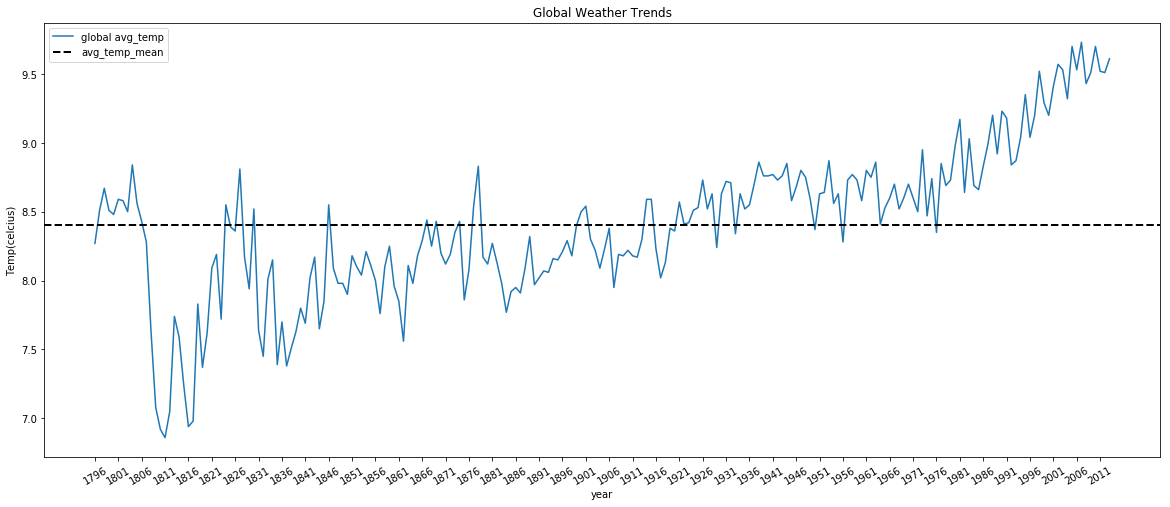

In [44]:
plt.figure(figsize=(20,8))
plt.plot(global_data1.year,global_data1.avg_temp,label='global avg_temp')
plt.axhline(global_data1.avg_temp.mean(),linestyle='dashed',color='black',linewidth=2,label='avg_temp_mean')
plt.legend()
plt.xlabel('year')
plt.ylabel('Temp(celcius)')
plt.title('Global Weather Trends')
plt.xticks(np.arange(1796,2013,5),rotation=30)
plt.show()

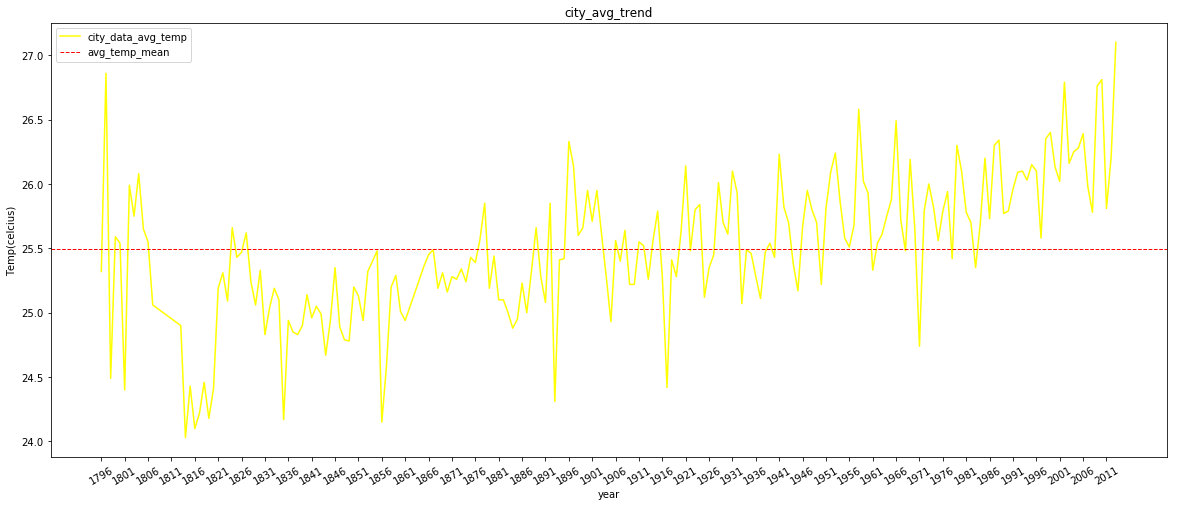

In [45]:
plt.figure(figsize=(20,8))
plt.plot(city_data.year,city_data.avg_temp,color='yellow',label='city_data_avg_temp')
plt.axhline(city_data.avg_temp.mean(),color='r',linestyle='dashed',linewidth=1,label='avg_temp_mean')
plt.legend()
plt.xlabel('year')
plt.ylabel('Temp(celcius)')
plt.title('city_avg_trend')
plt.xticks(np.arange(1796,2013,step=5),rotation=30)
plt.show()


# comparision of my city data vs global data

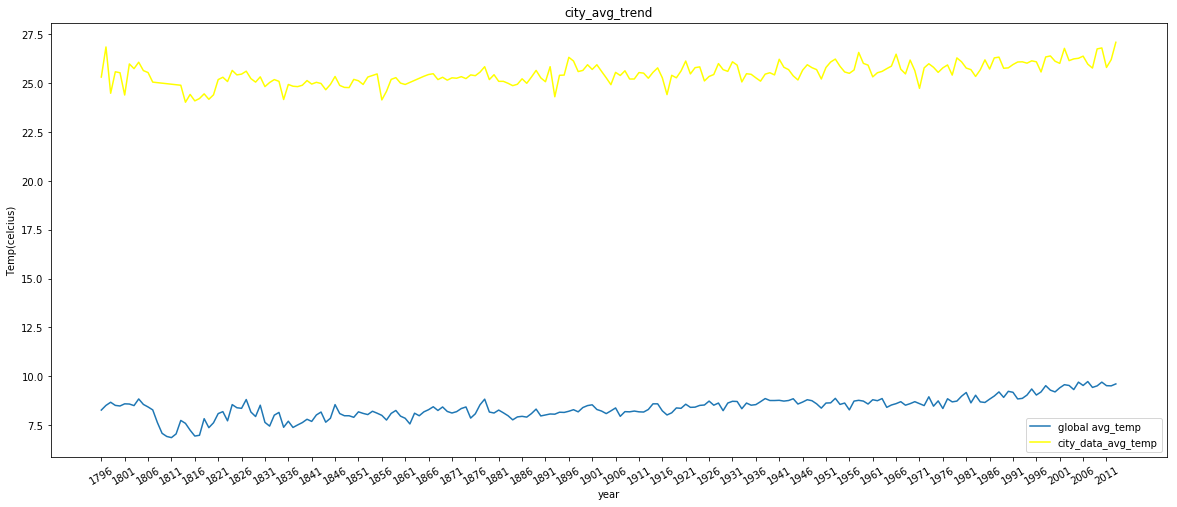

In [15]:
plt.figure(figsize=(20,8))
plt.plot(global_data1.year,global_data1.avg_temp,label='global avg_temp')
plt.plot(city_data.year,city_data.avg_temp,color='yellow',label='city_data_avg_temp')
plt.legend()
plt.xlabel('year')
plt.ylabel('Temp(celcius)')
plt.title('city_avg_trend')
plt.xticks(np.arange(1796,2013,step=5),rotation=30)
plt.show()

To observation Allahabad(my city data) and global weather trends fold lines,it's hard to anaylze weather trends.Because of the fold line fluctuates by years,with moving temperature could be solve the problem.

# Moving average and plots

implementing code for moving average for both 

In [46]:
city_data['moving_avg'] = 0.0
city_data['moving_avg']=city_data['avg_temp'].rolling(window=7).mean()
city_data.head(300)

,year,avg_temp,moving_avg
0,1796,25.32,NaN
1,1797,26.86,NaN
2,1798,24.49,NaN
3,1799,25.59,NaN
4,1800,25.54,NaN
...,...,...,...
213,2009,26.76,26.228571
214,2010,26.81,26.321429
215,2011,25.81,26.258571
216,2012,26.21,26.248571


In [47]:
global_data1['moving_avg']=0.0
global_data1['moving_avg']=global_data1['avg_temp'].rolling(window=7).mean() 

C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


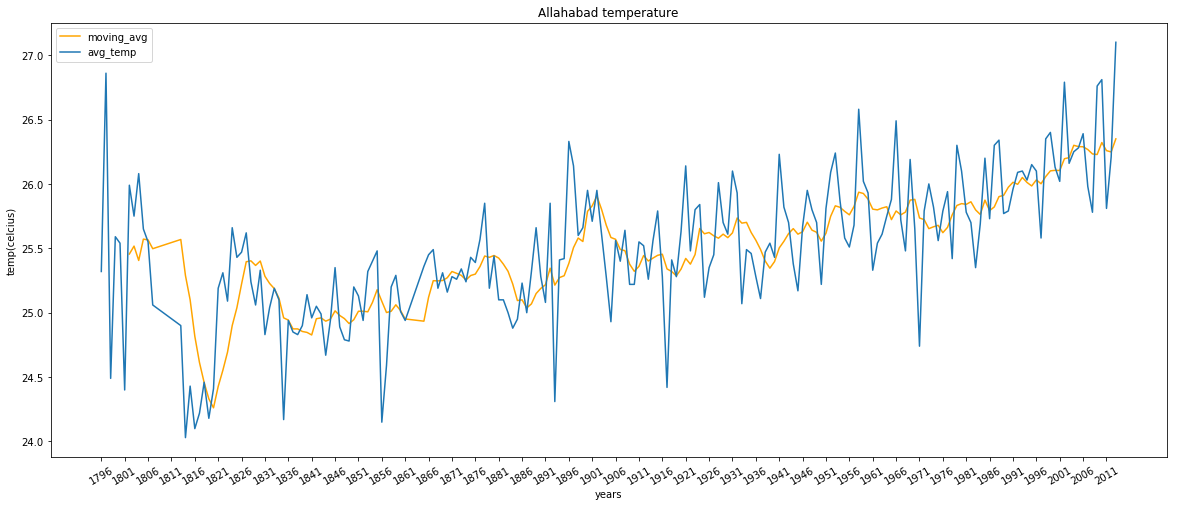

In [67]:
plt.figure(figsize=(20,8))
plt.plot(city_data.year,city_data.moving_avg,color='orange',label='moving_avg')
plt.plot(city_data.year,city_data.avg_temp,label='avg_temp')
plt.xlabel('years')
plt.ylabel('temp(celcius)')
plt.legend()
plt.title('Allahabad temperature')
plt.xticks(np.arange(1796,2013,5),rotation=30)
plt.show()

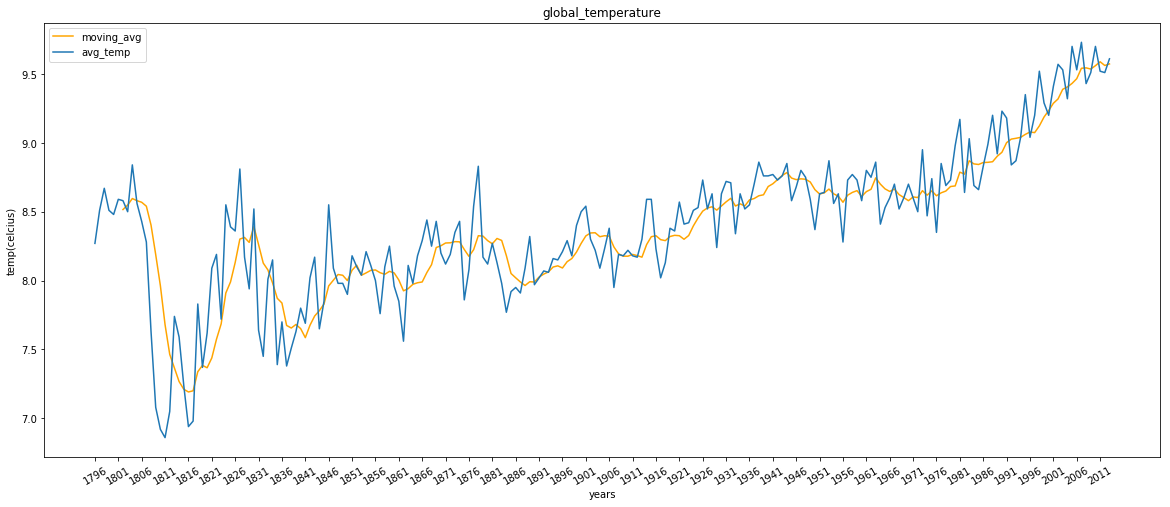

In [68]:
plt.figure(figsize=(20,8))
plt.plot(global_data1.year,global_data1.moving_avg,color='orange',label='moving_avg')
plt.plot(global_data1.year,global_data1.avg_temp,label='avg_temp')
plt.xlabel('years')
plt.ylabel('temp(celcius)')
plt.legend()
plt.title('global_temperature')
plt.xticks(np.arange(1796,2013,5),rotation=30)
plt.show()

plot for city(allahabad) and global

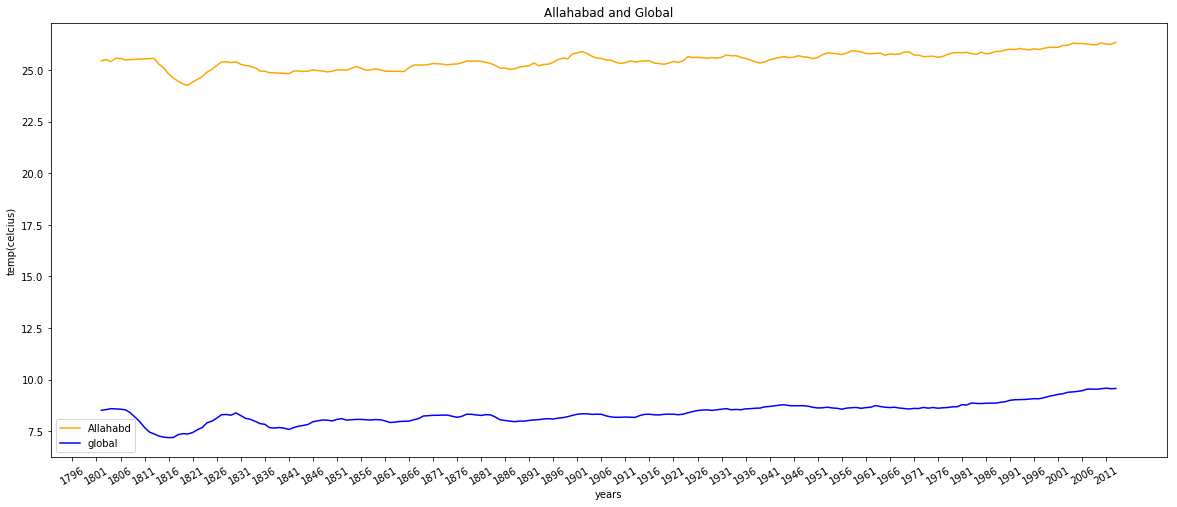

In [69]:
plt.figure(figsize=(20,8))
plt.plot(city_data.year,city_data.moving_avg,color='orange',label='Allahabd')
plt.plot(global_data1.year,global_data1.moving_avg,color='blue',label='global')
plt.xlabel('years')
plt.ylabel('temp(celcius)')
plt.legend()
plt.title('Allahabad and Global')
plt.xticks(np.arange(1796,2013,5),rotation=30)
plt.show()

# Analysis and Summary

In [66]:
city_data['moving_avg'].describe()

count    204.000000
mean      25.480735
std        0.412720
min       24.261429
25%       25.222857
50%       25.491429
75%       25.787143
max       26.350000
Name: moving_avg, dtype: float64

In [65]:
global_data1['moving_avg'].describe()

count    212.000000
mean       8.386132
std        0.490843
min        7.191429
25%        8.061786
50%        8.325000
75%        8.652857
max        9.588571
Name: moving_avg, dtype: float64

1.Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

ANS:-yes my city (allahabad) is hotter than the average global average temperature because in my city south asia and here so much humidity,that's why my city average temperatur is hot. yes,there is difference about 17 degree celsius if we are talking about moving average.

2.How do the changes in your city’s temperatures over time compare to the changes in the global average?

Ans:-In my city the minimum moving_avg temperature is around 24 and maximum moving temperature is about 26 then there is little difference i.e 2 degree celcius.when we looking on global there is change between max and min,the difference is 1 degree celcius.

3-What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

Ans:-To observation the whole weather trends the world is getting hotter and allahabd as well,experically in last few hundred years.from san francisco 7 years moving average plot is clearly to shows start from 1827 the temperature has  rising up .

In conclusion,from the fold lines have same up-trend that can be predict global and Allahabad temperature will continue to raising up. 

4-Is that will effect on global ecosystem or human living actuality?

Ans:-That will have more research to determine it.